#Importing Libraries

In [267]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re,json,nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score


In [268]:
#Miscellanous libraries
from collections import Counter

In [269]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [270]:
data = pd.read_csv('/content/drive/MyDrive/ DS/Product Review RawData.csv', encoding='UTF-8')
data

,Reviews,Sentiments,Classification
0,ডেলিভারিতে আমি আনেক খুশি প্যাকেজিং ভালো ছিলো,Positive,0
1,অরিজিনাল টা দেওয়ার জন্য ধন্যবাদ,Positive,0
2,চা অরজিনাল ছিল কোন পিনিক না থাকলেও খেতে দারুন,Positive,0
3,অস্থির পিনিক,Positive,0
4,অরিজিনাল টেস্ট,Positive,0
...,...,...,...
916,এদের জন্যই দেশের নাম খারাপ হয়,Negative,1
917,তোদের লজ্জা করা উচিত,Negative,1
918,কমপ্লেইন করার পরও লাভ হয় নি,Negative,1
919,বাজে ব্যবহার,Negative,1


In [271]:
print("Total Reviews:",len(data),
      "\nTotal Positive Reviews:",len(data[data.Classification ==0]),
      "\nTotal Negative Reviews:",len(data[data.Classification==1])
     )
      

Total Reviews: 921 
Total Positive Reviews: 481 
Total Negative Reviews: 440


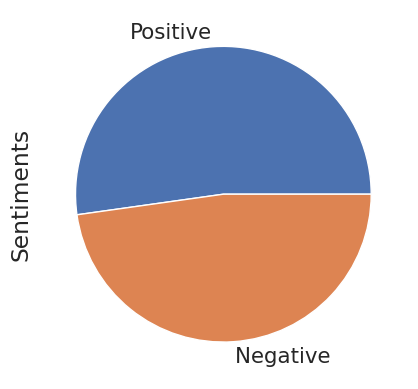

In [272]:
data['Sentiments'].value_counts().plot(kind='pie')
plt.show()

In [273]:
print("Total Reviews:",len(data),
      "\nTotal Positive Reviews:",len(data[data.Classification ==0]),
      "\nTotal Negative Reviews:",len(data[data.Classification==1])
     )
      

Total Reviews: 921 
Total Positive Reviews: 481 
Total Negative Reviews: 440


In [274]:
data.columns

Index(['Reviews', 'Sentiments', 'Classification'], dtype='object')

**Some unprocessed reviews**

In [275]:

# print some unprocessed reviews
sample_data = [10,100,150,200,250,600,622,666,689,640,700,750,800]
for i in sample_data:
      print(data.Reviews[i],'\n','Sentiment:-- ',data.Sentiments[i],'\n')

অসাধারন যেমন চেয়েছি তেমনই পেয়েছি এবং দামও কম 
 Sentiment:--  Positive 

দ্রুত ডেলিভারি দেয়ার জন্য দারাজকে ধন্যবাদ 
 Sentiment:--  Positive 

এটা ভালো  
 Sentiment:--  Positive 

আসল পণ্য ভাল নেটওয়ার্ক কভারেজ এবং দ্রুত বিতরণ 
 Sentiment:--  Positive 

অনেক ভালো প্রডাক্ট দেবার জন্য ধন্যবাদ 
 Sentiment:--  Positive 

সময় মত ডেলিভারি পেয়েছি কিন্তু প্রডাক্ট খুব ভালো কাজ করছে না
 
 Sentiment:--  Negative  

ছবিতে যেমন তেমন টা পায়নি একটা চিটাড়ি 
 Sentiment:--  Negative  

সাউন্ড কোয়ালিটি আরো খারাপ 
 Sentiment:--  Negative  

খুব আলগা 
 Sentiment:--  Negative  

খুব ধীর ডেলিভারি 
 Sentiment:--  Negative  

লাইট ২১ টা নষ্ট হলে হোক বাট এইসব লিকেজ চেক করে দিবেন ভাই  ২ বার শক খেয়েছি  ডান হাত এখনও কাপছে  
 Sentiment:--  Negative  

আমি চাইলাম কালো দিলেন সাদা এইডা কিছু হইলো? এমন করে ব্যবসা করা যায় না 
 Sentiment:--  Negative  

কাজ করে না 
 Sentiment:--  Negative  



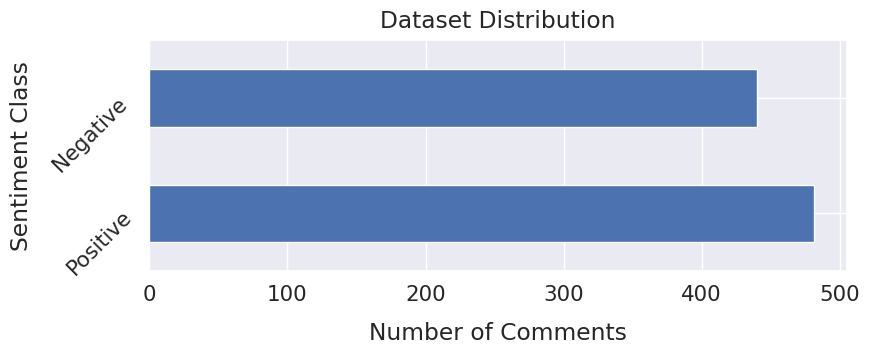

In [276]:
sns.set(font_scale=1.4)
data['Sentiments'].value_counts().plot(kind='barh', figsize=(9, 3))
plt.xlabel("Number of Comments", labelpad=12)
plt.ylabel("Sentiment Class", labelpad=12)
plt.yticks(rotation = 45)
plt.title("Dataset Distribution", y=1.02);

**Data Cleaning**

In [277]:
!pip install bnlp_toolkit
!pip install bangla-stemmer
#importing stemmer
from bnlp import BasicTokenizer
from bnlp.corpus import stopwords, punctuations, letters, digits
from bangla_stemmer.stemmer import stemmer
import re
btokenizer = BasicTokenizer()

def clean_text(text):
    text = re.sub('[^\u0980-\u09FF]',' ',str(text))
    tokens = btokenizer.tokenize(text)
    stmr = stemmer.BanglaStemmer()
    stm = stmr.stem(tokens)
    filtered = []
    for i in stm:
      
        if i in stopwords:
            continue
    
        if i in punctuations + '‘' + '’':
            continue
       
        filtered.append(i)
    
    return " ".join(filtered)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Apply The Function in to the Dataframe**

In [278]:
# Apply the function into the dataframe
data['cleaned'] = data['Reviews'].apply(clean_text)  



applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied first rules..
applied first rules..
applied first rules..
applied second rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied 

In [279]:
# print some cleaned reviews from the dataset
sample_data = [120,220,330,456,548,779,879,99]
for i in sample_data:
     print('Original:\n',data.Reviews[i],'\nCleaned:\n',
           data.cleaned[i],'\n','Sentiment:-- ',data.Sentiments[i],'\n')

Original:
 ভালো আছে অনেক টাই  
Cleaned:
 ভালো আছ টাই 
 Sentiment:--  Positive 

Original:
 আপনি সেরা পরিষেবা সরবরাহকারী 
Cleaned:
 সের পরিষেবা সরবরাহকারী 
 Sentiment:--  Positive 

Original:
 এখনো ভালোই চলছে 
Cleaned:
 এখনো ভালো চল 
 Sentiment:--  Positive 

Original:
 সবাই নিতে পারেন এতো কমদামে ভাল প্রডাক আমি পর পর তিনটি নিয়েছি অনেক অনেক ভাল চার্জার কেবল 
Cleaned:
 সবা নিত কমদামে ভাল প্রডাক তিন ভাল চার্জার কেবল 
 Sentiment:--  Positive 

Original:
 না নেয়ার জন্য ই বলবো  
Cleaned:
 নেয় বলবো 
 Sentiment:--  Negative  

Original:
 ব্যাটারি ছাড়া পাঠিয়েছিল 
Cleaned:
 ব্যাটারি ছাড়া পাঠিয়েছিল 
 Sentiment:--  Negative  

Original:
 অনেকবার মারা খাইছি আর না 
Cleaned:
 অনেকব মার খাই 
 Sentiment:--  Negative  

Original:
 ৭ তারিখে অর্ডার করেছিলাম 
Cleaned:
 ৭ তারিখে অর্ড করেছি 
 Sentiment:--  Positive 



**After Preprocessing**

In [280]:
data

,Reviews,Sentiments,Classification,cleaned
0,ডেলিভারিতে আমি আনেক খুশি প্যাকেজিং ভালো ছিলো,Positive,0,ডেলিভারি আনেক খুশি প্যাকেজিং ভালো ছিলো
1,অরিজিনাল টা দেওয়ার জন্য ধন্যবাদ,Positive,0,অরিজিনাল টা দেওয় ধন্যবাদ
2,চা অরজিনাল ছিল কোন পিনিক না থাকলেও খেতে দারুন,Positive,0,চা অরজিনাল পিনিক থাকলে খেত দারুন
3,অস্থির পিনিক,Positive,0,অস্থির পিনিক
4,অরিজিনাল টেস্ট,Positive,0,অরিজিনাল টেস্ট
...,...,...,...,...
916,এদের জন্যই দেশের নাম খারাপ হয়,Negative,1,দেশের নাম খারাপ
917,তোদের লজ্জা করা উচিত,Negative,1,তোদের লজ্জা কর
918,কমপ্লেইন করার পরও লাভ হয় নি,Negative,1,কমপ্লেইন কর লাভ নি
919,বাজে ব্যবহার,Negative,1,বাজে ব্যবহ


In [281]:
data=data[['cleaned','Classification']]
data.head()

,cleaned,Classification
0,ডেলিভারি আনেক খুশি প্যাকেজিং ভালো ছিলো,0
1,অরিজিনাল টা দেওয় ধন্যবাদ,0
2,চা অরজিনাল পিনিক থাকলে খেত দারুন,0
3,অস্থির পিনিক,0
4,অরিজিনাল টেস্ট,0



**The summary of the reviews and words distribution in the dataset**

In [282]:
#Dataset Summary

def data_summary(data):
    
    documents = []
    words = []
    u_words = []
    total_u_words = [word.strip() for t in list(data.cleaned) for word in t.strip().split()]
    class_label= [k for k,v in data.Classification	.value_counts().to_dict().items()]
  # find word list
    for label in class_label: 
        word_list = [word.strip() for t in list(data[data.Classification	==label].cleaned) for word in t.strip().split()]
        counts = dict()
        for word in word_list:
                counts[word] = counts.get(word, 0)+1
                
        # sort the dictionary of word list  
        ordered = sorted(counts.items(), key= lambda item: item[1],reverse = True)
        
        # Documents per class
        documents.append(len(list(data[data.Classification	==label].cleaned)))
        
        # Total Word per class
        words.append(len(word_list))
        
        # Unique words per class 
        u_words.append(len(np.unique(word_list)))
       
        print("\nClass Name : ",label)
        print("Number of Documents:{}".format(len(list(data[data.Classification	==label].cleaned))))  
        print("Number of Words:{}".format(len(word_list))) 
        print("Number of Unique Words:{}".format(len(np.unique(word_list)))) 
        print("Most Frequent Words:\n")
        for k,v in ordered[:10]:
              print("{}\t{}".format(k,v))
                
    print("Total Number of Unique Words:{}".format(len(np.unique(total_u_words))))           
   
    return documents,words,u_words,class_label


documents,words,u_words,class_names = data_summary(data)   


Class Name :  0
Number of Documents:481
Number of Words:2444
Number of Unique Words:875
Most Frequent Words:

ভালো	138
ভাল	103
প্রোডাক্ট	75
পণ্য	51
এক	49
দাম	42
ধন্যবাদ	40
কর	39
পেয়েছি	33
আছ	30

Class Name :  1
Number of Documents:440
Number of Words:2174
Number of Unique Words:966
Most Frequent Words:

কর	57
এক	45
প্রোডাক্ট	42
বাজে	41
ভালো	31
খারাপ	25
অর্ড	24
পণ্য	22
থেক	21
টাকা	20
Total Number of Unique Words:1554


**Dataset Summary Visualization**

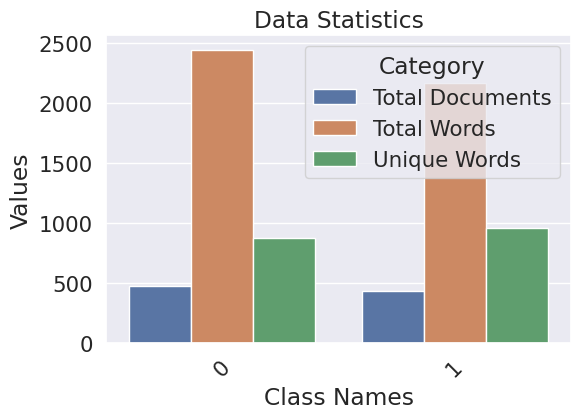

In [283]:
data_matrix = pd.DataFrame({'Total Documents':documents,
                            'Total Words':words,
                            'Unique Words':u_words,
                            'Class Names':class_names})
df = pd.melt(data_matrix, id_vars="Class Names", var_name="Category", value_name="Values")
plt.figure(figsize=(6, 4))
ax = plt.subplot()

sns.barplot(data=df,x='Class Names', y='Values' ,hue='Category')
ax.set_xlabel('Class Names') 
ax.set_title('Data Statistics')

ax.xaxis.set_ticklabels(class_names, rotation=45);

**Text Length Distribution**

<ipython-input-284-7e04fada3662>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ReviewLength'] = data.cleaned.apply(lambda x:len(x.split()))


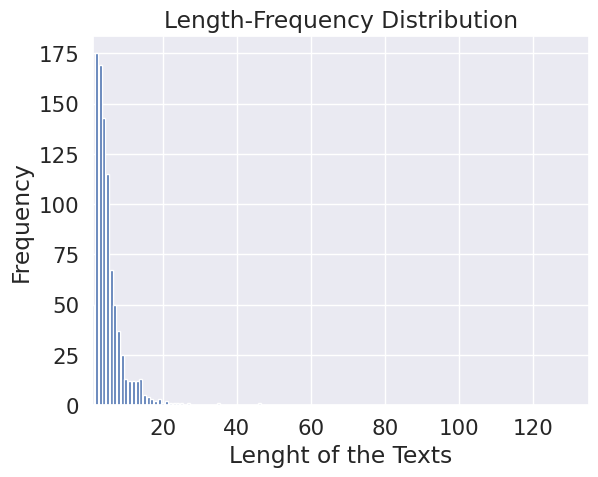

Maximum Length of a review: 46
Minimum Length of a review: 0
Average Length of a reviews: 5.0


In [284]:
# Calculate the Review of each of the Review
data['ReviewLength'] = data.cleaned.apply(lambda x:len(x.split()))
frequency = dict()
for i in data.ReviewLength:
    frequency[i] = frequency.get(i, 0)+1

plt.bar(frequency.keys(), frequency.values(), color ="b")
plt.xlim(1, 135)
# in this notbook color is not working but it should work.
plt.xlabel('Lenght of the Texts')
plt.ylabel('Frequency')
plt.title('Length-Frequency Distribution')
plt.show()  
print(f"Maximum Length of a review: {max(data.ReviewLength)}")
print(f"Minimum Length of a review: {min(data.ReviewLength)}")
print(f"Average Length of a reviews: {round(np.mean(data.ReviewLength),0)}")

**Using over-sampling to balance the dataset**

In [285]:
pcomment = data[data.Classification == 0][:481]
pcomment


,cleaned,Classification,ReviewLength
0,ডেলিভারি আনেক খুশি প্যাকেজিং ভালো ছিলো,0,6
1,অরিজিনাল টা দেওয় ধন্যবাদ,0,4
2,চা অরজিনাল পিনিক থাকলে খেত দারুন,0,6
3,অস্থির পিনিক,0,2
4,অরিজিনাল টেস্ট,0,2
...,...,...,...
476,বীজ সঠিক সময় হাত পেয়েছি ভালো হচ্ বীজ গুলো টবে ...,0,14
477,ভেবেছি তারচ ভালো ধন্যবাদ,0,4
478,ভালো ছিলো প্যাকেজিং ১০ টা ম্যাস্ক ছিলো সিল দেয়...,0,13
479,ভালো মান মাক্স,0,3


In [286]:
ncomment = data[data.Classification==1]
ncomment


,cleaned,Classification,ReviewLength
481,ভালো দিনে বড় সাইজ এক ধর,1,6
482,থেক প্রডাক্ট নেওয় থেক কেনা ভালো,1,6
483,অড করছি ৪ ৫ তারিখ ক্যনছেল কর আব অড কর আছ প্রডা...,1,14
484,বক্স ভিজা,1,2
485,বোতল মুখ ভাংগা,1,3
...,...,...,...
916,দেশের নাম খারাপ,1,3
917,তোদের লজ্জা কর,1,3
918,কমপ্লেইন কর লাভ নি,1,4
919,বাজে ব্যবহ,1,2


In [287]:
dataset = pd.concat([pcomment,ncomment], axis = 0)


**Feature Extraction Using TF-IDF**

In [288]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf1 = TfidfVectorizer(ngram_range=(1,1),use_idf=True,tokenizer=lambda x: x.split()) 
X = tfidf1.fit_transform(dataset['cleaned'])
y=dataset['Classification'].values
print("Shape of TF-IDF:",X.shape,'\n')


Shape of TF-IDF: (921, 1554) 



/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


**Feature Extraction Using Count Vectorizer**

**Oversampling**

In [289]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot

In [290]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [291]:
X.shape

(962, 1554)

In [292]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Class=0, n=481 (50.000%)
Class=1, n=481 (50.000%)


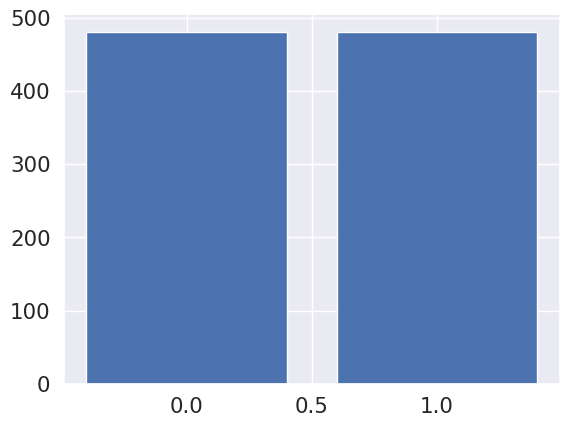

In [293]:
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

**Splitting Dataset**

In [294]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,y,train_size = 0.90, test_size = 0.10,random_state =100)
print('Shape of X_train:', xtrain.shape)
print('Shape of X_test:', xtest.shape)
print('Shape of Y_train:', ytrain.shape)
print('Shape of Y_test:', ytest.shape)

Shape of X_train: (865, 1554)
Shape of X_test: (97, 1554)
Shape of Y_train: (865,)
Shape of Y_test: (97,)


In [295]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(xtrain,ytrain)
predicted_LR = lr.predict(xtest)
l=accuracy_score(ytest,predicted_LR)
print(l)

0.8350515463917526


In [296]:
from sklearn.metrics import classification_report
print(classification_report(ytest, predicted_LR))

              precision    recall  f1-score   support

           0       0.90      0.80      0.85        55
           1       0.77      0.88      0.82        42

    accuracy                           0.84        97
   macro avg       0.83      0.84      0.83        97
weighted avg       0.84      0.84      0.84        97



In [297]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
a=precision_score(ytest, predicted_LR,average='micro')
b=recall_score(ytest, predicted_LR,average='micro')
c=f1_score(ytest, predicted_LR,average='micro')
print("Precision_score",a)
print("Recall_score",b)
print("F1_score",c)

Precision_score 0.8350515463917526
Recall_score 0.8350515463917526
F1_score 0.8350515463917526


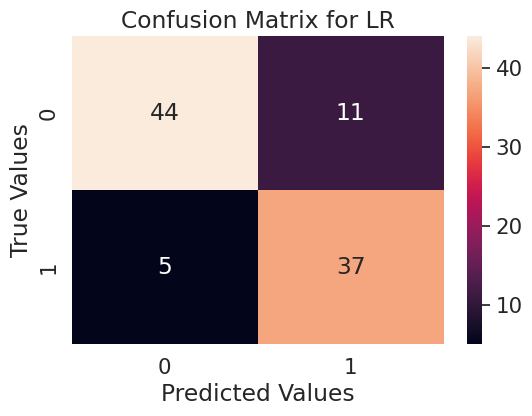

In [298]:
from sklearn.metrics import precision_score, recall_score,f1_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

fig = plt.figure(figsize=(6, 4))
cm = confusion_matrix(ytest,predicted_LR)
sns.heatmap(cm, annot=True)
plt.title("Confusion Matrix for LR")
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();

In [299]:
#naive bayes
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(xtrain, ytrain)
predicted_NB = mnb.predict(xtest)
n=accuracy_score(ytest,predicted_NB)
print(n)


0.8969072164948454


In [300]:
from sklearn.metrics import classification_report
print(classification_report(ytest, predicted_NB))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91        55
           1       0.94      0.81      0.87        42

    accuracy                           0.90        97
   macro avg       0.91      0.89      0.89        97
weighted avg       0.90      0.90      0.90        97



In [301]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
a1=precision_score(ytest, predicted_NB,average='micro')
b1=recall_score(ytest, predicted_NB,average='micro')
c1=f1_score(ytest, predicted_NB,average='micro')
print("Precision_score",a1)
print("Recall_score",b1)
print("F1_score",c1)

Precision_score 0.8969072164948454
Recall_score 0.8969072164948454
F1_score 0.8969072164948453


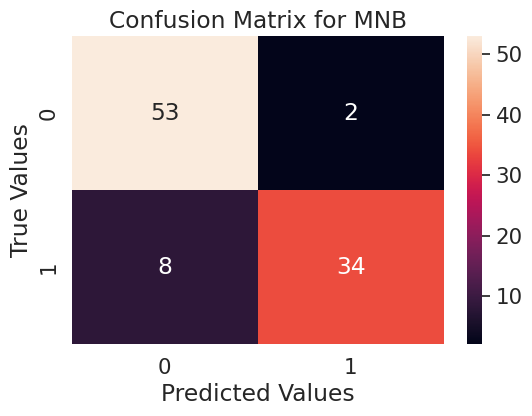

In [302]:
fig = plt.figure(figsize=(6, 4))
cm = confusion_matrix(ytest,predicted_NB)
sns.heatmap(cm, annot=True)
plt.title("Confusion Matrix for MNB")
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();

In [303]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1, metric = 'minkowski')
knn.fit(xtrain,ytrain)
predicted_KNN = knn.predict(xtest)
k=accuracy_score(ytest,predicted_KNN)
print(k)

0.7216494845360825


In [304]:
from sklearn.metrics import classification_report
print(classification_report(ytest, predicted_KNN))

              precision    recall  f1-score   support

           0       0.97      0.53      0.68        55
           1       0.61      0.98      0.75        42

    accuracy                           0.72        97
   macro avg       0.79      0.75      0.72        97
weighted avg       0.81      0.72      0.71        97



In [305]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
a2=precision_score(ytest, predicted_KNN,average='micro')
b2=recall_score(ytest, predicted_KNN,average='micro')
c2=f1_score(ytest, predicted_KNN,average='micro')
print("Precision_score",a2)
print("Recall_score",b2)
print("F1_score",c2)

Precision_score 0.7216494845360825
Recall_score 0.7216494845360825
F1_score 0.7216494845360826


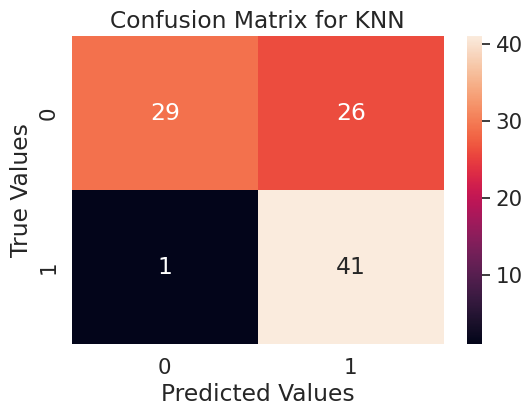

In [306]:
fig = plt.figure(figsize=(6, 4))
cm = confusion_matrix(ytest,predicted_KNN)
sns.heatmap(cm, annot=True)
plt.title("Confusion Matrix for KNN")
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();

In [307]:
#SVM
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
lsvm=SVC(kernel="linear", probability=True)
lsvm.fit(xtrain,ytrain)
predicted_SVM = lsvm.predict(xtest)
s=accuracy_score(ytest,predicted_SVM)
print(s)


0.865979381443299


In [308]:
from sklearn.metrics import classification_report
print(classification_report(ytest, predicted_SVM))

              precision    recall  f1-score   support

           0       0.94      0.82      0.87        55
           1       0.80      0.93      0.86        42

    accuracy                           0.87        97
   macro avg       0.87      0.87      0.87        97
weighted avg       0.88      0.87      0.87        97



In [309]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
a3=precision_score(ytest, predicted_SVM,average='micro')
b3=recall_score(ytest, predicted_SVM,average='micro')
c3=f1_score(ytest, predicted_SVM,average='micro')
print("Precision_score",a3)
print("Recall_score",b3)
print("F1_score",c3)

Precision_score 0.865979381443299
Recall_score 0.865979381443299
F1_score 0.8659793814432989


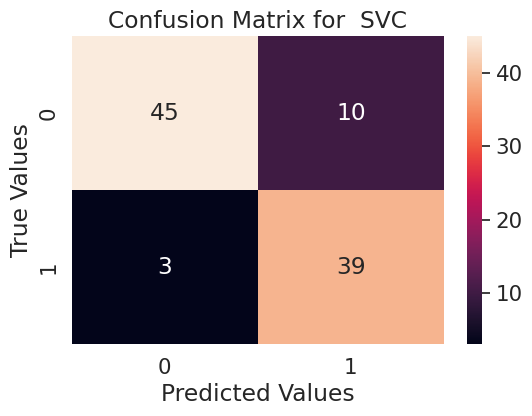

In [310]:
fig = plt.figure(figsize=(6, 4))
cm = confusion_matrix(ytest,predicted_SVM)
sns.heatmap(cm, annot=True)
plt.title("Confusion Matrix for  SVC")
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();

In [311]:
#SVM
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
ksvm=SVC(kernel = 'rbf', probability=True)
ksvm.fit(xtrain,ytrain)
predicted_SVMc = ksvm.predict(xtest)
y=accuracy_score(ytest,predicted_SVMc)
print(y)
print("Accuracy: {0:.2%}".format(accuracy_score(predicted_SVMc, ytest)))

0.8865979381443299
Accuracy: 88.66%


In [312]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier()  
dt.fit(xtrain,ytrain)
predicted_DT = dt.predict(xtest)
t=accuracy_score(ytest,predicted_DT)
print(t)

0.7731958762886598


In [313]:
from sklearn.metrics import classification_report
print(classification_report(ytest, predicted_DT))

              precision    recall  f1-score   support

           0       0.85      0.73      0.78        55
           1       0.70      0.83      0.76        42

    accuracy                           0.77        97
   macro avg       0.78      0.78      0.77        97
weighted avg       0.79      0.77      0.77        97



In [314]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
a4=precision_score(ytest, predicted_DT,average='micro')
b4=recall_score(ytest, predicted_DT,average='micro')
c4=f1_score(ytest, predicted_DT,average='micro')
print("Precision_score",a4)
print("Recall_score",b4)
print("F1_score",c4)

Precision_score 0.7731958762886598
Recall_score 0.7731958762886598
F1_score 0.7731958762886598


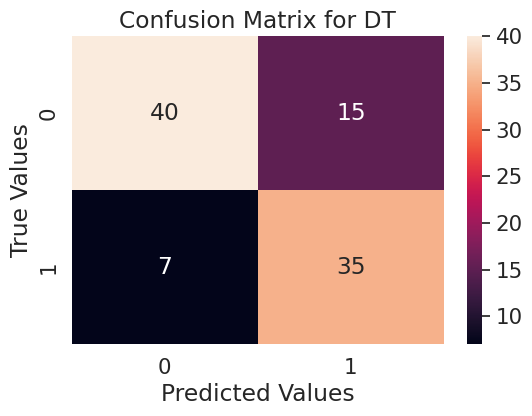

In [315]:
fig = plt.figure(figsize=(6, 4))
cm = confusion_matrix(ytest,predicted_DT)
sns.heatmap(cm, annot=True)
plt.title("Confusion Matrix for DT")
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();

In [316]:
#random forest 
from sklearn.ensemble import RandomForestClassifier
rf =RandomForestClassifier(n_estimators= 100, criterion="entropy",random_state = 0)
rf .fit(xtrain,ytrain)
predicted_RF = rf .predict(xtest)
r=accuracy_score(ytest,predicted_RF)
print(r)


0.7938144329896907


In [317]:
from sklearn.metrics import classification_report
print(classification_report(ytest, predicted_RF))

              precision    recall  f1-score   support

           0       0.89      0.73      0.80        55
           1       0.71      0.88      0.79        42

    accuracy                           0.79        97
   macro avg       0.80      0.80      0.79        97
weighted avg       0.81      0.79      0.79        97



In [318]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
a5=precision_score(ytest, predicted_RF,average='micro')
b5=recall_score(ytest, predicted_RF,average='micro')
c5=f1_score(ytest, predicted_RF,average='micro')
print("Precision_score",a5)
print("Recall_score",b5)
print("F1_score",c5)

Precision_score 0.7938144329896907
Recall_score 0.7938144329896907
F1_score 0.7938144329896907


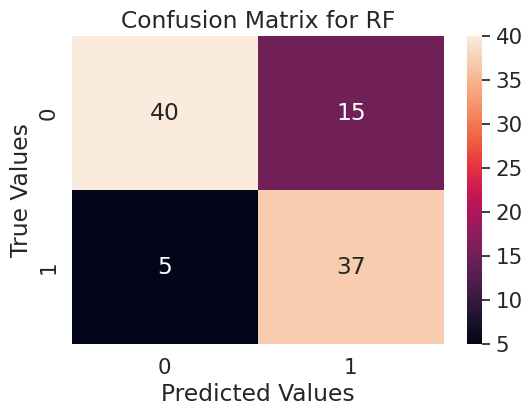

In [319]:
fig = plt.figure(figsize=(6, 4))
cm = confusion_matrix(ytest,predicted_RF)
sns.heatmap(cm, annot=True)
plt.title("Confusion Matrix for RF")
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();

**Comparison**

In [320]:
import pandas as pd
  
# creating and initializing a nested list
datas = [[l, a, b, c],
            [n, a1, b1, c1],
            [k, a2, b2, c2],
            [s, a3, b3, c3],
            [t, a4, b4, c4],
            [r, a5, b5, c5]]
  
# Create a DataFrame object
df = pd.DataFrame(datas,
                  columns=['Accuracy', 'Precision Score', 'Recall Score', 'F1 Score'],
                  index=['LR','MNB', 'KNN', 'SVM', 'DT', 'RF'])
df

,Accuracy,Precision Score,Recall Score,F1 Score
LR,0.835052,0.835052,0.835052,0.835052
MNB,0.896907,0.896907,0.896907,0.896907
KNN,0.721649,0.721649,0.721649,0.721649
SVM,0.865979,0.865979,0.865979,0.865979
DT,0.773196,0.773196,0.773196,0.773196
RF,0.793814,0.793814,0.793814,0.793814


**Testing result for single string**

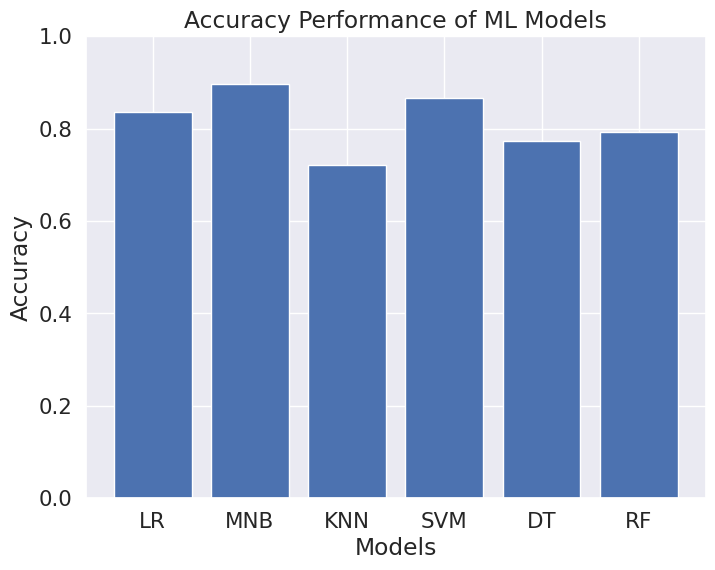

In [321]:
import matplotlib.pyplot as plt

# Assuming you have a list of model names and corresponding accuracy scores
model_names = ['LR', 'MNB', 'KNN','SVM','DT','RF']
accuracy_scores = [l, n, k,s,t,r]

# Plotting the accuracy scores
plt.figure(figsize=(8, 6))
plt.bar(model_names, accuracy_scores)
plt.title('Accuracy Performance of ML Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set the y-axis limit from 0 to 1 (accuracy range)
plt.show()


In [322]:
def predict(text):
    text=clean_text(text)
    text = tfidf1.transform([text])
    y =mnb.predict(text)
    print(y)
    if(y==0):
        print('positive')
    elif(y==1):
        print('negative')
   
a="পুরো ডিসপ্লেতে ছোট বড় কালো ছাপ"
predict(a)

applied first rules..
applied second rules..
applied second rules..
applied second rules..
[1]
negative
